In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95))]
d2['ratek'] = d2['rate']/1000.0
scatterm = {
    2.0: '^',
    4.0: 'o',
    6.0: 'v',
    8.0: '*'
}

/tmp/ipykernel_977367/419116236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['ratek'] = d2['rate']/1000.0


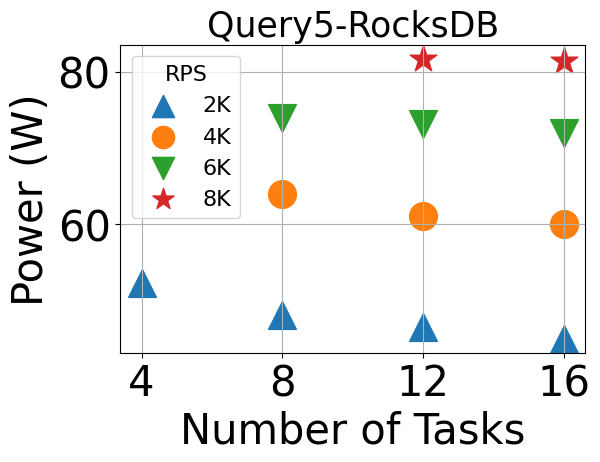

In [6]:
plt.rcParams['figure.figsize'] = 6,4
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

for rk in d2['ratek'].unique().tolist():
    d3 = d2[d2.ratek==rk]
    plt.scatter(d3['nwindows'], d3['pkg_watts_avg'], s=400, marker=scatterm[rk], label=f"{int(rk)}K")
    
#plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)
#plt.colorbar(label='Rate (K)')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Tasks')
plt.ylabel('Power (W)')
plt.title('Query5-RocksDB', size=25)
plt.legend(loc='upper left', markerscale=0.8, fontsize=16, title="RPS", title_fontsize=16, ncol=1)

#plt.ylim(bottom=0)
#plt.xlim(left=0)
plt.grid()
plt.savefig("query5diffmappersrocksdbwindowlength60.pdf", bbox_inches='tight')
